# Solid brake disc simulation

In [55]:
import numpy
import sympy
from sympy import *
from matplotlib import pyplot
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

calculate the heat flux in a unite time

In [56]:
# initial parameters of the brake disc
sympy.init_printing()
(F, P, T, r, p_max, pi, r_i, dr, r_o, f_r, n, N) = sympy.symbols('F P T r p_max  pi  r_i  dr  r_o  f_r n  N')

In [57]:
r = sympy.symbols('r', positive = True)
clamping_force = sympy.Eq(F, integrate((2*pi*p_max*r), (r, r_i, r_o)))

In [58]:
clamping_force

$$F=\int_{r_o}^{r_i}2{\pi}p_{max}rdr=2{\pi}p_{max}r_i(r_{o}-r_{i})$$

calculate the heat generation power(heat flux between callipers and discs) 

In [73]:
heat_generation = sympy.Eq(P, integrate((2*pi*r*f_r*p_max*n*2*pi*r*N/60),(r, r_i, r_o)))

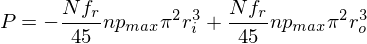

In [74]:
heat_generation 

$$P=\int_{r_o}^{r_i}2{\pi}rf_rp_{max}\left(\frac{n2{\pi}}{60}\right)rNdr$$

In [75]:
P_sol = sympy.solve(heat_generation, P) 

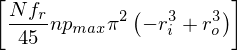

In [76]:
P_sol

In [77]:
heatflux = P_sol.evalf(subs={pi:numpy.pi, f_r:0.2, n:840, p_max:13e5, N:1, r_i:81.1/1000, r_o:131.1/1000})

AttributeError: 'list' object has no attribute 'evalf'

In [78]:
heatflux

In [79]:
#parameters of the solid brake disc (brembo)
r_i = 81.1/1000 #m    #inner circular radius
r_o = 131.1/1000 #mm    #outor circular radius
b = 11/1000 #mm        #thickness of disc
H = r_o - r_i  #mm width of the disc

nx = 110
ny = 500
nt = 500

x = numpy.linspace(0, b, nx)
y = numpy.linspace(0, H, ny)

dx = b/(nx-1)
dy = H/(ny-1)

alpha = 50 #W/Km
sigma = 0.2
dt = sigma*min(dx, dy)**2/alpha

Ti = numpy.ones((ny, nx))*298   # kelvin temperature

In [83]:
f_r = 0.2
p_max = 13e5 #unite pa
n = 840
N = 1

In [84]:
heat_flux = N*f_r*n*p_max*(numpy.pi**2)*(r_o**3 - r_i**3)/45

In [85]:
heat_flux #unit W/m^2

In [ ]:
def ftcs(T, nt, alpha, dt, dx, dy, p):
    
    for n in range(nt):
        Tn = T.copy()
        T[1:-1,1:-1] = Tn[1:-1, 1:-1] + \
            alpha*dt/dx**2 * (Tn[1:-1,2:] - 2*Tn[1:-1,1:-1] + Tn[1:-1,:-2]) + \
            alpha*dt/dy**2 * (Tn[2:,1:-1] - 2*Tn[1:-1,1:-1] + Tn[:-2,1:-1])
        
        # Neumann Boundary Conditions
        #left boundary
        

In [45]:
1300e3

In [46]:
13e5